
# Tutorial 11 – Neural Networks

In this tutorial we will learn how to use neural network to solve classification and regression problem. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import keras

sns.set()  # make plots nicer

A neural network is nothing more than a parametrized function $f(x, \Theta)$. Parameters of the function are called *weights* and denoted $\Theta$. At begining, we dont know the optimal weights and we have to find them. The proces of searching for optimal weights we call *neural network training* and it coresponds to the model fiting that we already know.

The neural network can represent wide range of nonlinear functions. The network topology determines a family of functions that the network can represent. In this course we will work mainly with [Feed Forward Neural Netwroks](https://en.wikipedia.org/wiki/Feedforward_neural_network). This type is used to solve supervised classification or regression tasks. In a current research, we can meet also another topologies and neural network schemes. The most important ones are [Convolutional Neural Networks](https://en.wikipedia.org/wiki/Convolutional_neural_network) for image or signal processing, [Recurrent Neural Networks](https://en.wikipedia.org/wiki/Recurrent_neural_network) for processing time series or [Generative Adversarial Networks (GANs)](https://en.wikipedia.org/wiki/Generative_adversarial_network) for generating artificial data.

## Multi Layer Perceptron

The simplest network is called Perceptron. We can see it as a type of a linear classifier. If we want to represent more complex functions (in general non-linear functions), we can stack perceptrons together and create Multi-Layer Perceptron. In Scikit learn, this model is implemented as a class [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). The usage of this model is very similar to another classification models. It has many parameters, which refer to both network topology and the process of training. If we are talking about the network topology, the most interesting parameter for us is a number of hidden layers. 

![multi layer perceptron schema](https://www.fi.muni.cz/~xcechak1/IB031/assets/FNN.png)

In this image, we can see MLP with three hidden layers. The first two hidden layers have six neurons each. The third hidden layer has eight neurons. The number of neurons in the input layer coresponds to the number of dataset attributes. The size of output layer corresponds to the number of desired classes.

In [4]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

### MLP Classificator
We try classification on MNIST dataset. It is a dataseet of handwriten digits. In the Scikit package, there is a simplified version of this dataset with 1797 samples. Each sample has dimension only 8x8 pixels. 


In [6]:
def show_digits(digits, labels, num_col=0, img_dim=8):
    """ display digits with labels """

    sns.set_style("whitegrid", {"axes.grid": False})
    digits = np.reshape(digits, (digits.shape[0], img_dim, img_dim))
    num_row = 1
    if num_col == 0:
        num_col = 5
    fig, axes = plt.subplots(1, num_col, figsize=(1.5 * num_col, 2 * num_row))
    for i in range(num_col):
        ax = axes[i]
        ax.imshow(digits[i], cmap="gray")
        ax.set_title("Label: {}".format(labels[i]))
        ax.set(yticklabels=[])
        ax.set(xticklabels=[])
    plt.tight_layout()
    plt.show()

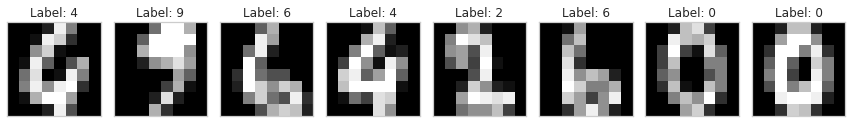

In [8]:
mnist = datasets.load_digits()
mnist_X, mnist_y = mnist.data, mnist.target

digits = np.reshape(mnist_X, (1797, 8, 8))

mnist_train_X, mnist_test_X, mnist_train_y, mnist_test_y = train_test_split(
    mnist_X, mnist_y, test_size=0.2, random_state=1
)


show_digits(mnist_train_X, mnist_train_y, num_col=8)

<div class="alert alert-block alert-warning"><b>Exercise 1</b></div>

Create MLP model with three hidden layers with $256$, $128$ and $64$ neurons to classify MNIST dataset. Compare the result with svm model. Evaluate both models models on the test set. Use random state 42 for MLP model initialization. Do not forget to scale the values using `StandardScaler()`.

HINT:
- MPL training can take some time. To see the training progress you can set `verbose` on True.
- loss is a measure how well your network performs. Training process decreases loss to improve the network performance.

MLP weighted average F1 score: $0.9917$  
SVM weighted average F1 score: $0.9833$


In [9]:
# TODO: your code goes here...
# mlp = ...
# mlp_pred_y = ...
# svm_pred_y = ...
from sklearn.svm import SVC
from sklearn.metrics import f1_score

mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(256,128,64),
        random_state=42,
        verbose=False
    )
)

svc = make_pipeline(
    StandardScaler(),
    SVC()
)

mlp.fit(mnist_train_X, mnist_train_y)
mlp_pred_y = mlp.predict(mnist_test_X)
print(f1_score(mnist_test_y, mlp_pred_y, average='weighted'))

svc.fit(mnist_train_X, mnist_train_y)
svc_pred_y = svc.predict(mnist_test_X)
print(f1_score(mnist_test_y, svc_pred_y, average='weighted'))

0.9917128800545086
0.9832642884541618


Very well. We are able to train a neural network, that reconizes hanwriten digits with a high. To increase it even more, we shoud tune hyper-parameters and also train the network little bit longer. You can try it later. Now, the performance of our model is comparable with SVM. The SVM belongs to the 30 best performing methods on a MNIST dataset. 

We can check our results also by confusion matrix or display some of wrongly classifed digits.


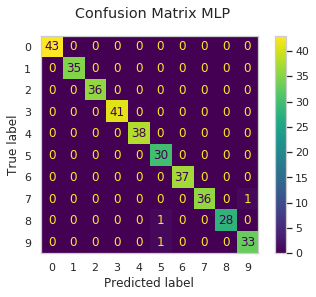

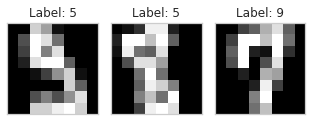

In [10]:
from sklearn import metrics

sns.set_style("whitegrid", {"axes.grid": False})
disp = metrics.plot_confusion_matrix(mlp, mnist_test_X, mnist_test_y)
disp.figure_.suptitle("Confusion Matrix MLP")
digits = mnist_test_X[mlp_pred_y != mnist_test_y]
labels = mlp_pred_y[mlp_pred_y != mnist_test_y]

show_digits(digits, labels, num_col=len(labels))

It can look like that our network significantly overperformed SVM. In the second exercise, se show, that it is not really true. The neural network is initialized by random weights. It we train the network just for short time, the final result of the training depends on the quality of weights that we got.

<div class="alert alert-block alert-warning"><b>Exercise 2</b></div>

Approximate the real performance of this network by cross validation on the 10 folds (train/test splits). Plot the scores in the histogram. Use more jobs to make the computation faster. Do not fix the radom state by a constant number. You can make more runs of the experiment and then evaluate all data together. 

Expected value: $0.975 \pm 0.02$


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67640b5ed0>]],
      dtype=object)

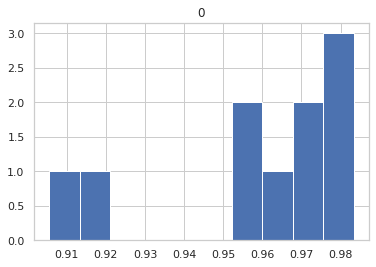

In [17]:
# TODO: your code goes here...
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mlp, mnist_X, mnist_y, cv=10, n_jobs=-1)
pd.DataFrame(scores).hist()

### MLP Regressor

The second Neural network, that we use is MLPRegressor. The only difference to the MLPClassifier is, that it predicts real values and not lkabels of classes.
We will try the regression on Californian Housing dataset


In [18]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()

housing_X = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_y = housing.target


housing_train_X, housing_test_X, housing_train_y, housing_test_y = train_test_split(
    housing_X, housing_y, test_size=0.1, random_state=1
)

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

<div class="alert alert-block alert-warning"><b>Exercise 3</b></div>

Use MLPRegressor to predict 'median house value' given by California Housing Dataset. Compare the result with LinearRegression model. For both models use PowerTransformer to normalize input values. Store the predictions into variables `mlpr_pred_y`and `lr_pred_y`. Measure the models performance usinr RMSE.

HINT:
- RMSE measure the performance in the opposite way to F1 score that we used in previous exercises - the smaller value is the better
- use the network topology (256, 128, 64) or try to find a better one
- turn on `early_stopping` parameter of MLPRegressor to make the training shorter

Expected results:  
MLPRegression RMSE: $0.5060$  
LinearRegression RMSE: $0.7135$  


In [20]:
# TODO: your code goes here...
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

mlpr = make_pipeline(
    PowerTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(256,128,64),
        early_stopping=True
    )
)

lr = make_pipeline(
    PowerTransformer(),
    LinearRegression()
)

mlpr.fit(housing_train_X, housing_train_y)
mlpr_pred_y = mlpr.predict(housing_test_X)
print(np.sqrt(mean_squared_error(housing_test_y, mlpr_pred_y)))

lr.fit(housing_train_X, housing_train_y)
lr_pred_y = lr.predict(housing_test_X)
print(np.sqrt(mean_squared_error(housing_test_y, lr_pred_y)))

0.509664760132204
0.7134541875066712


We can vizualize results using scatter plot with expected and predicted values. In the ideal case, all the points would be on a green line. 


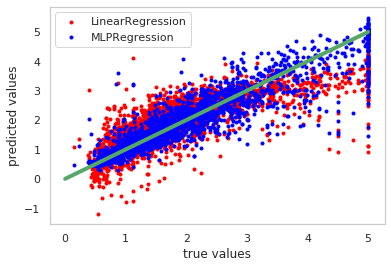

In [21]:
plt.scatter(housing_test_y, lr_pred_y, marker=".", color="red")
plt.scatter(housing_test_y, mlpr_pred_y, marker=".", color="blue")
plt.legend(["LinearRegression", "MLPRegression"], loc="upper left")

plt.xlabel("true values")
plt.ylabel("predicted values")
plt.plot([0, 5], [0, 5], "g-", linewidth=4, markersize=12)
plt.show()

Another way, how to visually compare performance of two models is to show histograms of errors. In this case, we can see that red model has low number of small errors and higer variability of error values. We can deduce, that blue model performs better.


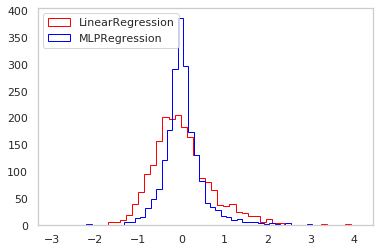

In [22]:
b = plt.hist(housing_test_y - lr_pred_y, color="red", histtype="step", bins=50)
c = plt.hist(housing_test_y - mlpr_pred_y, color="blue", histtype="step", bins=50)
plt.legend(["LinearRegression", "MLPRegression"], loc="upper left")

plt.show()

## Deep Learning Libraries

The package scikit learn offers only limited support for a deep learning. Therefore, we try to use more advanced libraries.

The first one is [TensorFlow](https://www.tensorflow.org/). It is symbolic math library, that supports complex graph computations. It is helpful to provide efficient computing of complex neural networks.
The second library is called [Keras](https://keras.io/) and it is special Deep Learning API. It uses Tensorflow as a backend. Both libraries are opensource. To continue this lecture, please install both on your compter. They are not part of standard Python distribution.

The succes of installation check on the following imports.


In [23]:
import keras
import tensorflow as tf

Now we can build a neural network model. To train the syntax, we will build the same model as we used in the first exercise. It will have $512$, $256$, and $128$ neurons in hidden layers. The number of neurons in the input and the output layer will corespond to the number of attributes and to the number of detected classes, respectively. For the training we use full version of MNIST dataset, where one image has size $28 \times 28$.

The MLP models are in Keras called `Sequential`. The basic layers are called `Dense` layers.

Download training and testing files:  
* [train_X](https://www.fi.muni.cz/~xcechak1/IB031/datasets/train-images-idx3-ubyte.npy)
* [train_y](https://www.fi.muni.cz/~xcechak1/IB031/datasets/train-labels-idx1-ubyte.npy)  
* [test_X](https://www.fi.muni.cz/~xcechak1/IB031/datasets/t10k-images-idx3-ubyte.npy)
* [test_y](https://www.fi.muni.cz/~xcechak1/IB031/datasets/t10k-labels-idx1-ubyte.npy)  

In [24]:
from keras.utils import to_categorical

train_X = np.load("train-images-idx3-ubyte.npy").reshape((60000, 28 * 28))
train_y = np.load("train-labels-idx1-ubyte.npy").reshape((60000,))
test_X = np.load("t10k-images-idx3-ubyte.npy").reshape((10000, 28 * 28))
test_y = np.load("t10k-labels-idx1-ubyte.npy").reshape((10000,))

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

print(train_y.shape)
print(test_y.shape)

(60000, 10)
(10000, 10)


<div class="alert alert-block alert-warning"><b>Exercise 4</b></div>

Replace all the None values by an integers to define a neural network model.


In [31]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=512, activation='relu', input_dim=28*28))  # first hidden layer
model.add(Dense(units=256, activation='relu'))  # second hidden layer
model.add(Dense(units=128, activation='relu'))  # third hidden layer
model.add(Dense(units=10, activation='softmax'))  # output layer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


Now we can train the model. Notice, that the syntax is very similar to sklearn library.


In [32]:
model.fit(train_X, train_y, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.9919 - accuracy: 0.8997
Epoch 2/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.2011 - accuracy: 0.9464
Epoch 3/5
60000/60000 [==============================] - 13s 225us/step - loss: 0.1624 - accuracy: 0.9554
Epoch 4/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.1254 - accuracy: 0.9647
Epoch 5/5
60000/60000 [==============================] - 11s 189us/step - loss: 0.1087 - accuracy: 0.9696


In [33]:
pred_y = model.predict(test_X)

<div class="alert alert-block alert-warning"><b>Exercise 5</b></div>

In the network output `pred_y` there are probalities, that the sample belongs to the classes from $0$ to $9$.
To the variable `pred_y_labels` store labels with the highest probability.


In [55]:
# TODO: pred_y_labels = your code goes here...
pred_y_labels = np.argmax(pred_y, axis=1)
pred_y_labels

array([7, 2, 1, ..., 4, 5, 6])

Now we can evaluate the training using confussion matrix and also other metrics. 


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

true_y_labels = np.argmax(test_y, axis=1)
print("\nConfusion Matrix")
print(confusion_matrix(true_y_labels, pred_y_labels))
print("\nClassification Report")
target_names = [str(i) for i in range(10)]
print(classification_report(true_y_labels, pred_y_labels, target_names=target_names))


Confusion Matrix
[[ 967    0    0    0    0    0    5    2    5    1]
 [   0 1110    2    1    1    0    2    2   14    3]
 [   3    2 1006    5    0    0    5    3    8    0]
 [   0    0    4  960    0   18    0    3   14   11]
 [   0    0    8    0  917    0   12    1    3   41]
 [   2    0    0    7    0  857    4    0   18    4]
 [   4    3    1    0    0    4  939    0    6    1]
 [   0    1   10    6    2    1    1  985    4   18]
 [   4    0    2    5    1    0    1    2  957    2]
 [   2    1    0    2    5    2    0    2   14  981]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.95      0.96      1010
           4       0.99      0.93      0.96       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97      

We can also print images with uncorrect labeling and show, what were the probabilities of the labels.


In [57]:
def show_prediction(pred_y, test_X, test_y, index=0):
    """ function to visualize MNIST sample and classification probabilities"""

    labels = list(range(10))
    fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=False)
    img = test_X[index]
    img = img.reshape((28, 28))

    axs[0].imshow(img, cmap="gray")
    axs[0].set(yticklabels=[])
    axs[0].set(xticklabels=[])
    orig_class = np.argmax(test_y[index])
    axs[0].set_title(f"original class: {orig_class}")

    axs[1].bar(labels, pred_y[index])
    axs[1].set_ylim([0, 1])
    axs[1].set_xticks(np.arange(len(labels)))
    axs[1].set_xticklabels(labels)
    pred_class = np.argmax(pred_y[index])
    axs[1].set_title(f"predicted class: {pred_class}")
    axs[1].grid()

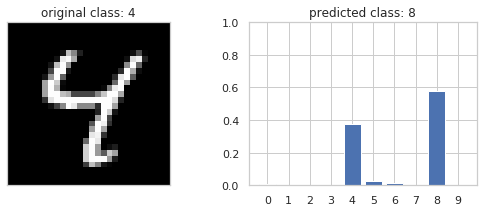

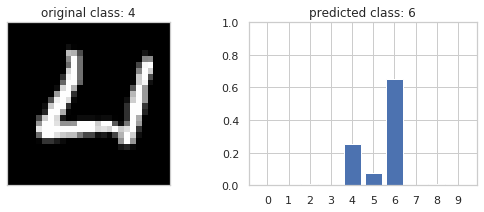

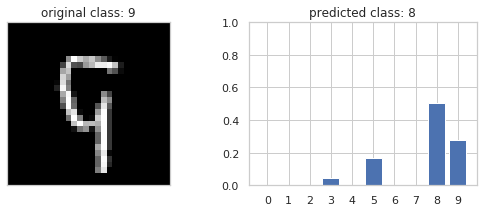

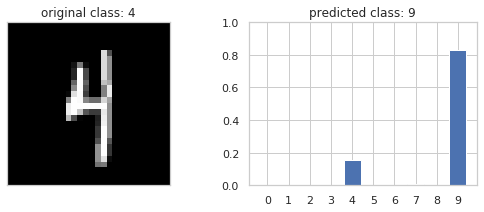

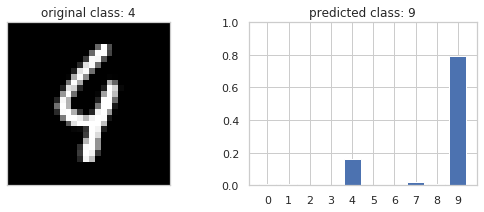

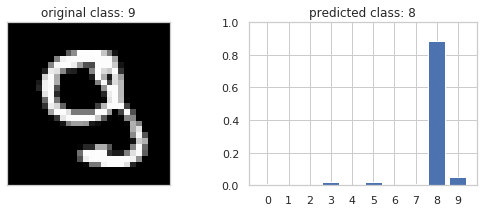

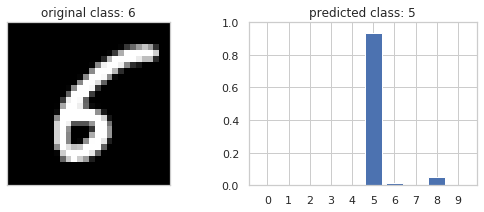

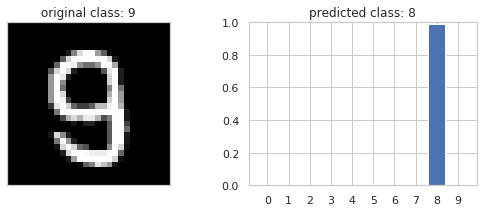

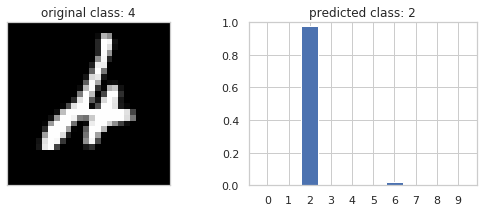

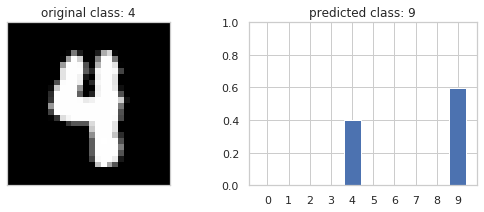

In [58]:
true_y_labels = np.argmax(test_y, axis=1)
uncorrect = np.array(range(len(pred_y)))[pred_y_labels != true_y_labels]

for i in range(10):
    show_prediction(pred_y, test_X, test_y=test_y, index=uncorrect[i])

<div class="alert alert-block alert-danger"><b>Exercise 6</b></div>

Build and train Convolutional neural network, following this schema. Use classes [Conv2D](https://keras.io/layers/convolutional/#conv2d), [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d), [Flatten](https://keras.io/layers/core/#flatten) and [Dense](https://keras.io/layers/core/#dense). Do not forget to set kernel sizes properly. Convolutional layers have $32$ and $64$ features. Dense layers have $3136$ and $128$ neurons. Compare the performance with your MLP network.

![CNN for MNIST classification schema](https://www.fi.muni.cz/~xcechak1/IB031/assets/CNN.png)


In [ ]:
# TODO: your code goes here...
model = Sequential()

model.add(Dense(units=512, activation='relu', input_dim=28*28))  # first hidden layer
model.add(Dense(units=256, activation='relu'))  # second hidden layer
model.add(Dense(units=128, activation='relu'))  # third hidden layer
model.add(Dense(units=10, activation='softmax'))  # output layer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

In [60]:
from keras import Input, Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        padding="same",
        activation="relu",
        input_shape=(28, 28, 1),
    )
)
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

## Functional API
inputs = Input(shape=(28, 28, 1))
conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu")(
    inputs
)
pooling1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv1)
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu")(
    pooling1
)
pooling2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv2)
flatten = Flatten()(pooling2)
dense1 = Dense(units=128, activation="relu")(flatten)
predictions = Dense(units=10, activation="softmax")(dense1)
model = Model(inputs=inputs, outputs=predictions)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

train_X = np.load("train-images-idx3-ubyte.npy").reshape((60000, 28, 28, 1))
test_X = np.load("t10k-images-idx3-ubyte.npy").reshape((10000, 28, 28, 1))

model.fit(x=train_X, y=train_y, batch_size=128, epochs=3)

SyntaxError: invalid syntax (<ipython-input-60-5390c669d256>, line 22)